In [1]:
!pip install tensorflow numpy


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
#Load the dataset
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()


In [4]:
#Normalizing the pixel values
train_images=train_images.astype('float32')/255
test_images=test_images.astype('float32')/255

In [5]:
#Reshaping the images to (28,28,1)
train_images=np.expand_dims(train_images,-1)
test_images=np.expand_dims(test_images,-1)

In [6]:
#One-hot encoding of labels
train_labels=to_categorical(train_labels,10)
test_labels=to_categorical(test_labels,10)

In [7]:
#Step 2: Building the Model Architecture
model=Sequential()

In [8]:
#1st Convolutional Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#1st Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))
#2nd Convolutional Layer
model.add(Conv2D(64,(3,3),activation='relu'))
#2nd Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2,2)))
#3rd Convolutional Layer
model.add(Conv2D(128,(3,3),activation='relu'))
#4th Convolutional Layer
model.add(Conv2D(256,(3,3),activation='relu'))

C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
#Flattening
model.add(Flatten())
#1st Fully Connected Layer
model.add(Dense(128,activation='relu'))
#2nd Fully Connected Layer
model.add(Dense(50,activation='relu'))
#3rd Fully Connected Layer
model.add(Dense(50,activation='relu'))
#Output Layer
model.add(Dense(10,activation='softmax'))
#Step 3: Compile the Model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_images,train_labels,epochs=10,batch_size=128,validation_split=0.2)
# Evaluate the Model on the Test Set
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('Test accuracy:',test_acc)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 32s 63ms/step - accuracy: 0.8334 - loss: 0.8787 - val_accuracy: 0.9889 - val_loss: 0.0537
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 68ms/step - accuracy: 0.9948 - loss: 0.0243 - val_accuracy: 0.9886 - val_loss: 0.0546
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 74ms/step - accuracy: 0.9966 - loss: 0.0147 - val_accuracy: 0.9877 - val_loss: 0.0643
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.9957 - loss: 0.0201 - val_accuracy: 0.9897 - val_loss: 0.0529
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9957 - loss: 0.0187 - val_accuracy: 0.9847 - val_loss: 0.0617
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 23s 62ms/step - accuracy: 0.9950 - loss: 0.0198 - val_accuracy: 0.9862 - val_loss: 0.0612
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 25s 65ms/step - accuracy: 0.9967 - loss: 0.0121 - val_accuracy: 0.9902 - val_loss: 0.0475
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 72ms/step - accuracy: 0.9976 - loss: 0.0106 - 

In [14]:
import matplotlib.pyplot as plt

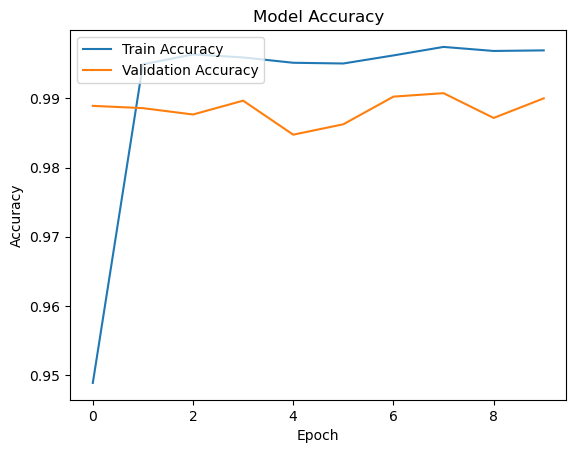

In [15]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

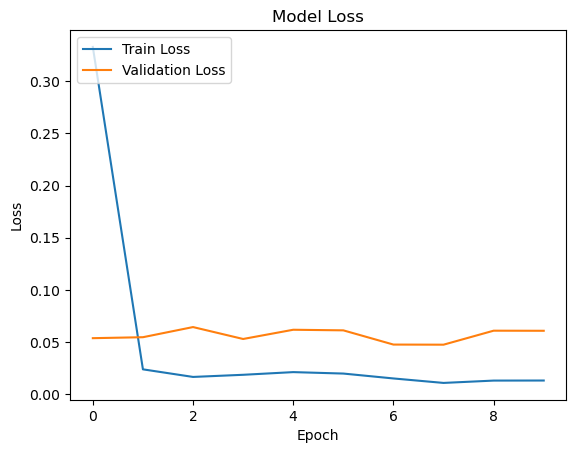

In [16]:
# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()